In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
end_date = datetime.now()
start_date = end_date + timedelta(-365)
df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas')
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-09-28,290.72,105.52
2018-10-01,291.73,105.24
2018-10-02,291.56,105.36
2018-10-03,291.72,104.86
2018-10-04,289.44,104.56


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [5]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-09-28,NaN,NaN
2018-10-01,0.003474,-0.002654
2018-10-02,-0.000583,0.001140
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861


In [6]:
# Calculate volatility
# YOUR CODE HERE
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
print(std_dev_daily_return_spy)
print(std_dev_daily_return_agg)

0.01061614114757229
0.0019685040074790515


In [7]:
# Save the last day's closing price
# YOUR CODE HERE
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]
print(spy_last_price)
print(agg_last_price)

295.4
113.14


In [8]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [9]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # YOUR CODE HERE
    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 * 30 records
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(daily_returns.mean()['SPY']['close'], std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(daily_returns.mean()['AGG']['close'], std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    monte_carlo["SPY prices"] = pd.Series(simulated_spy_prices)
    monte_carlo["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.6, 0.4]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()  

In [10]:
# Print records from the DataFrame
portfolio_cumulative_returns.head()  

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003239,0.993738,0.990567,0.998632,1.006143,1.009210,1.012367,0.993531,1.001885,0.998728,...,1.000645,1.001813,0.993269,1.001704,0.990303,0.996383,1.010814,1.011523,1.009150,1.012464
2,1.008766,0.998165,0.988765,0.997464,1.010236,0.996461,1.004601,0.979234,1.000359,1.009794,...,0.995430,1.005979,0.984177,0.995534,0.988777,0.990488,1.002138,1.012644,1.007048,1.016953
3,1.007262,0.997788,0.993017,0.989061,1.009009,1.000634,1.009060,0.971169,0.999591,1.019777,...,1.002309,1.002277,0.974987,1.001566,0.984586,0.991285,0.995236,1.013388,1.008503,1.026256
4,1.018189,1.001051,0.987387,0.996083,1.010119,0.993160,1.006534,0.967443,1.009637,1.005181,...,1.008596,0.999630,0.973536,1.006344,0.975724,0.993894,0.983883,1.014615,1.012686,1.020125


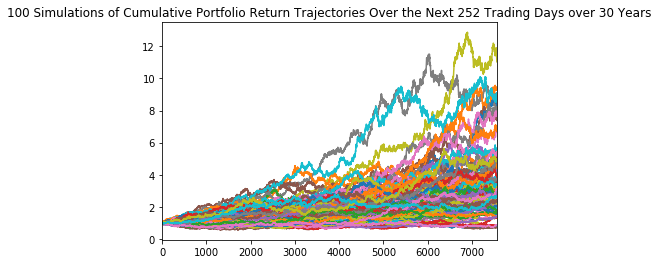

In [11]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days over 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [12]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    4.193951
1    3.251602
2    4.990681
3    5.446459
4    4.694422
Name: 7560, dtype: float64

In [13]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative20_returns = portfolio_cumulative_returns.iloc[-2520, :]
ending_cumulative20_returns.head()

0    1.962442
1    2.238417
2    1.606730
3    2.597268
4    2.864957
Name: 5041, dtype: float64

In [14]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    1.286450
0.95    7.855822
Name: 7560, dtype: float64

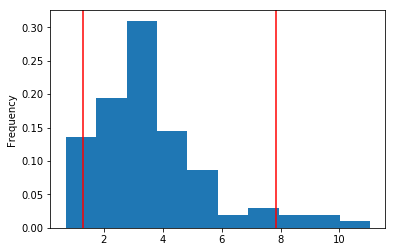

In [15]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$50,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

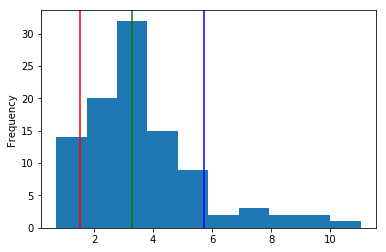

In [16]:
# YOUR CODE HERE
retirement_confidence_interval= ending_cumulative_returns.quantile(q=[0.1,0.5,0.9])
plt.figure();
ending_cumulative_returns.plot(kind='hist', bins=10)
plt.axvline(retirement_confidence_interval.iloc[0], color='r')
plt.axvline(retirement_confidence_interval.iloc[1], color='g')
plt.axvline(retirement_confidence_interval.iloc[2], color='b')

In [17]:
retirement_confidence_interval

0.1    1.527660
0.5    3.267270
0.9    5.717186
Name: 7560, dtype: float64

### Given an initial investment of `$50,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [54]:
# YOUR CODE HERE
# Set initial investment
initial_investment = 50000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_10th_percentile = round(initial_investment * retirement_confidence_interval.iloc[0])
investment_pnl_50th_percentile = round(initial_investment * retirement_confidence_interval.iloc[1])
investment_pnl_90th_percentile = round(initial_investment * retirement_confidence_interval.iloc[2])
                                                    
# Print the results
print(f"Over the next 252 * 30 trading days the original $20,000 investment will end with:\n" 
      f"10% percentile return at: ${investment_pnl_10th_percentile} \n"
      f"50% percentile return at: ${investment_pnl_50th_percentile} \n"
      f"90% percentile return at: ${investment_pnl_90th_percentile} \n"
     )

Over the next 252 * 30 trading days the original $20,000 investment will end with:
10% percentile return at: $76383.0 
50% percentile return at: $163364.0 
90% percentile return at: $285859.0 



### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exeed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [55]:
# YOUR CODE HERE
current_projected_annual = 7398
withdrawl_income = investment_pnl_10th_percentile * .04

def retirement_income(x):
    if current_projected_annual > x:
        return("this does not meet the current projected annual income")
    else: 
        return("this does exceeds the current projected annual income")
    

In [56]:
print(f"With a withdrawl rate of 4% on the retirement income at ${round(withdrawl_income,2)}, {retirement_income(withdrawl_income)} of ${current_projected_annual}.")

With a withdrawl rate of 4% on the retirement income at $3055.32, this does not meet the current projected annual income of $7398.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [59]:
# YOUR CODE HERE
new_initial_investment = initial_investment * 1.5
new_withdrawl_income = new_investment_pnl_10th_percentile * .04

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
new_investment_pnl_10th_percentile = round(new_initial_investment * retirement_confidence_interval.iloc[0])

In [60]:
print(f"With a withdrawl rate of 4% on the retirement income at ${round(new_withdrawl_income,2)}, {retirement_income(new_withdrawl_income)} of ${current_projected_annual}.")

With a withdrawl rate of 4% on the retirement income at $4583.0, this does not meet the current projected annual income of $7398.


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [69]:
# YOUR CODE HERE
